## World Debt Statistics Analysis

World Debt statistics dataset contains information about countries Debt , debt indicator and indicator code. 
In this project we shall use our dataset to answer questions below using SQL for querying database and Python for visualization

1. Exploring the World Bank’s international debt data.

2. Determining the number of distinct countries in the dataset.

3. Identifying the distinct debt indicators present in the dataset.

4. Calculating the total amount of debt owed by the countries.

5. Identifying the top 10 countries with the highest debt and examining the corresponding amount.

6. Calculating the average amount of debt across different debt indicators.

7. Determining the highest amount of principal repayments recorded.

8. Identifying the most common debt indicator.

dataset: https://github.com/cleavestone/Data-Analytics/blob/main/International_debt%20dataset.csv.  


In [1]:
#loading dependancies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as styles
styles.use("ggplot")
import mysql.connector

## Create Connection

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password='***********' 
)
print(mydb)

## Create Database

In [3]:
mycursor=mydb.cursor()
mycursor.execute("CREATE DATABASE world_debt_statistic")

In [4]:
# check databases
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('world_debt_statistic',)
('world_debt_statistics',)
('world_debts',)


## Create Table

In [5]:
# first  connect to our database world_debt_statistics
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="***********",
  database="world_debt_statistic"
)
mycursor=mydb.cursor(buffered=True)
mycursor.execute(
    """CREATE TABLE IF NOT EXISTS country_debts(
     country_name VARCHAR(70) NOT NULL,
     country_code CHAR(3) NOT NULL,
     indicator_name VARCHAR(200) NOT NULL,
     indicator_code VARCHAR(70) NOT NULL,
     debt DECIMAL(20,6) NOT NULL
 )""")

## Loading CSV data and inserting into our table

In [6]:
data=pd.read_csv(r'C:\Users\Hp\Downloads\International_debt dataset.csv')
data.head()

,country_name,country_code,indicator_name,indicator_code,debt
0,Afghanistan,AFG,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,72894453.7
1,Afghanistan,AFG,"Interest payments on external debt, long-term ...",DT.INT.DLXF.CD,53239440.1
2,Afghanistan,AFG,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,61739336.9
3,Afghanistan,AFG,"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD,49114729.4
4,Afghanistan,AFG,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,39903620.1


In [7]:
# Insert Data to Table
for i,row in data.iterrows():
            sql = "INSERT INTO country_debts VALUES (%s,%s,%s,%s,%s)"
            mycursor.execute(sql, tuple(row))
            # the connection is not autocommitted by default, so we  must commit to save our changes
            mydb.commit()


##  Query the database to check if records have been inserted

In [8]:
mycursor.execute("SELECT * FROM country_debts LIMIT 10")
results=mycursor.fetchall()
for result in results:
    print(result)

('Afghanistan', 'AFG', 'Disbursements on external debt, long-term (DIS, current US$)', 'DT.DIS.DLXF.CD', Decimal('72894453.700000'))
('Afghanistan', 'AFG', 'Interest payments on external debt, long-term (INT, current US$)', 'DT.INT.DLXF.CD', Decimal('53239440.100000'))
('Afghanistan', 'AFG', 'PPG, bilateral (AMT, current US$)', 'DT.AMT.BLAT.CD', Decimal('61739336.900000'))
('Afghanistan', 'AFG', 'PPG, bilateral (DIS, current US$)', 'DT.DIS.BLAT.CD', Decimal('49114729.400000'))
('Afghanistan', 'AFG', 'PPG, bilateral (INT, current US$)', 'DT.INT.BLAT.CD', Decimal('39903620.100000'))
('Afghanistan', 'AFG', 'PPG, multilateral (AMT, current US$)', 'DT.AMT.MLAT.CD', Decimal('39107845.000000'))
('Afghanistan', 'AFG', 'PPG, multilateral (DIS, current US$)', 'DT.DIS.MLAT.CD', Decimal('23779724.300000'))
('Afghanistan', 'AFG', 'PPG, multilateral (INT, current US$)', 'DT.INT.MLAT.CD', Decimal('13335820.000000'))
('Afghanistan', 'AFG', 'PPG, official creditors (AMT, current US$)', 'DT.AMT.OFFT.CD'

## Determining the number of distinct countries in the dataset

In [13]:
query='SELECT COUNT(DISTINCT(country_name)) FROM country_debts '
mycursor.execute(query)
results=mycursor.fetchone()
print(results)

(124,)


## Identifying the distinct debt indicators present in the dataset.

In [78]:
query='SELECT DISTINCT indicator_name FROM  country_debts'
mycursor.execute(query)
results=mycursor.fetchall()
for result in results:
    print(result[0])

Disbursements on external debt, long-term (DIS, current US$)
Interest payments on external debt, long-term (INT, current US$)
PPG, bilateral (AMT, current US$)
PPG, bilateral (DIS, current US$)
PPG, bilateral (INT, current US$)
PPG, multilateral (AMT, current US$)
PPG, multilateral (DIS, current US$)
PPG, multilateral (INT, current US$)
PPG, official creditors (AMT, current US$)
PPG, official creditors (DIS, current US$)
PPG, official creditors (INT, current US$)
Principal repayments on external debt, long-term (AMT, current US$)
Interest payments on external debt, private nonguaranteed (PNG) (INT, current US$)
PPG, bonds (AMT, current US$)
PPG, bonds (INT, current US$)
PPG, commercial banks (AMT, current US$)
PPG, commercial banks (DIS, current US$)
PPG, commercial banks (INT, current US$)
PPG, other private creditors (AMT, current US$)
PPG, other private creditors (DIS, current US$)
PPG, other private creditors (INT, current US$)
PPG, private creditors (AMT, current US$)
PPG, private

## Calculating the total amount of debt owed by the countries.

In [32]:
query='SELECT ROUND(SUM(debt),0) FROM country_debts'
mycursor.execute(query)
results=mycursor.fetchone()
print(results[0])

3079734487676


## Identifying the top 10 countries with the highest debt

Text(0.5, 1.0, 'Top Indebted Countries')

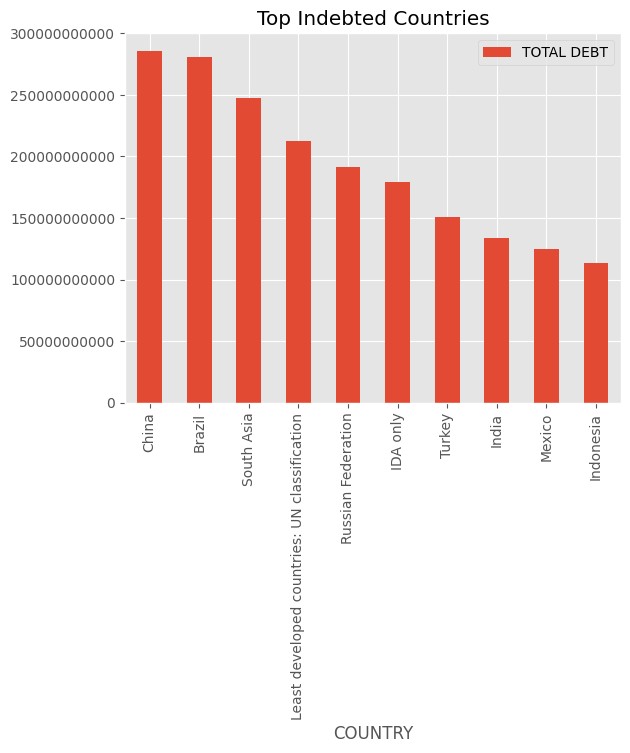

In [40]:
query='''SELECT country_name,ROUND(SUM(debt),0) AS debt FROM country_debts 
GROUP BY country_name ORDER BY debt DESC LIMIT 10'''
mycursor.execute(query)
results=mycursor.fetchall()
res=[(result[0],float(result[1])) for result in results]
df=pd.DataFrame(res, columns=['COUNTRY','TOTAL DEBT'])
ax=df.plot.bar(x='COUNTRY',y='TOTAL DEBT')
plt.ticklabel_format(style='plain',axis='y')
plt.title("Top Indebted Countries")

## Identifying the least indebted Countries

Text(0.5, 1.0, 'least Indebted Countries')

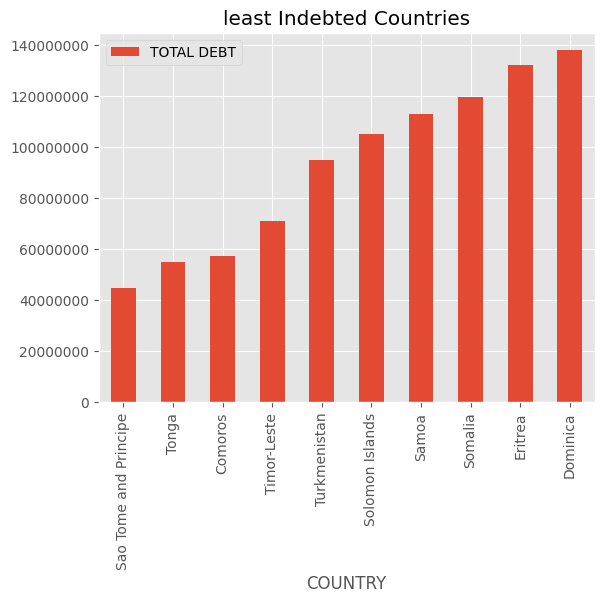

In [46]:
query='''SELECT country_name,ROUND(SUM(debt),0) AS debt FROM 
country_debts GROUP BY country_name ORDER BY debt  LIMIT 10'''
mycursor.execute(query)
results=mycursor.fetchall()
res=[(result[0],float(result[1])) for result in results]
df=pd.DataFrame(res, columns=['COUNTRY','TOTAL DEBT'])
df.plot.bar(x='COUNTRY',y='TOTAL DEBT')
plt.ticklabel_format(style='plain',axis='y')
plt.title("least Indebted Countries")

## Calculating the average amount of debt across different debt indicators

In [75]:
query='''SELECT indicator_code,indicator_name,ROUND(AVG(debt),0) AS `AVERAGE DEBT`  FROM
country_debts GROUP BY indicator_code, indicator_name'''
mycursor.execute(query)
results=mycursor.fetchall()
res=[(result[0],result[1],float(result[2])) for result in results]
df=pd.DataFrame(res,columns=['CODE','INDICATOR','AVERAGE DEBT'])
df=df.sort_values(by='AVERAGE DEBT',ascending=False).reset_index(drop=True)
pd.options.display.float_format = '{:.0f}'.format
df

,CODE,INDICATOR,AVERAGE DEBT
0,DT.AMT.DLXF.CD,"Principal repayments on external debt, long-te...",5904868401
1,DT.AMT.DPNG.CD,"Principal repayments on external debt, private...",5161194334
2,DT.DIS.DLXF.CD,"Disbursements on external debt, long-term (DIS...",2152041217
3,DT.DIS.OFFT.CD,"PPG, official creditors (DIS, current US$)",1958983453
4,DT.AMT.PRVT.CD,"PPG, private creditors (AMT, current US$)",1803694102
5,DT.INT.DLXF.CD,"Interest payments on external debt, long-term ...",1644024068
6,DT.DIS.BLAT.CD,"PPG, bilateral (DIS, current US$)",1223139290
7,DT.INT.DPNG.CD,"Interest payments on external debt, private no...",1220410844
8,DT.AMT.OFFT.CD,"PPG, official creditors (AMT, current US$)",1191187963
9,DT.AMT.PBND.CD,"PPG, bonds (AMT, current US$)",1082623948


## Determining the highest amount of principal repayments recorded

In [72]:
query='''
SELECT country_name,indicator_code,debt FROM country_debts WHERE (indicator_code='DT.AMT.DLXF.CD'
OR indicator_code='DT.AMT.DPNG.CD')
ORDER BY debt DESC
LIMIT 1
'''
mycursor.execute(query)
results=mycursor.fetchone()
print(results[0],results[1],float(results[2]))

China DT.AMT.DLXF.CD 96218620835.7


## Identifying the most common debt indicator.

In [83]:
query='''SELECT indicator_code,COUNT(indicator_code) AS COUNT  FROM country_debts 
GROUP BY indicator_code ORDER BY COUNT DESC LIMIT 10'''
mycursor.execute(query)
results=mycursor.fetchall()
for result in results:
    print(result[0],result[1])

DT.INT.DLXF.CD 124
DT.AMT.DLXF.CD 124
DT.AMT.MLAT.CD 124
DT.INT.MLAT.CD 124
DT.AMT.OFFT.CD 124
DT.INT.OFFT.CD 124
DT.DIS.DLXF.CD 123
DT.AMT.BLAT.CD 122
DT.INT.BLAT.CD 122
DT.DIS.OFFT.CD 122


In [87]:
!jupyter nbconvert --to webpdf --allow-chromium-download International_debt_statistic.ipynb

[NbConvertApp] Converting notebook International_debt_statistic.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 243476 bytes to International_debt_statistic.pdf
